<a href="https://colab.research.google.com/github/ACSE-ecm22/L1TestRepo/blob/main/Copy_of_DL_module_Coursework_I_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: [*your name goes here*]
### ***CID***: [*your CID goes here*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [80]:
!pip install pycm livelossplot
%pylab inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit

from livelossplot import PlotLosses
from pycm import *
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torchsummary import summary


import matplotlib.pyplot as plt
import numpy as np
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [81]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True


def set_device(device="cpu", idx=0):
    if device != "cpu":
        if torch.cuda.device_count() > idx and torch.cuda.is_available():
            print("Cuda installed! Running on GPU {} {}!".format(idx, torch.cuda.get_device_name(idx)))
            device="cuda:{}".format(idx)
        elif torch.cuda.device_count() > 0 and torch.cuda.is_available():
            print("Cuda installed but only {} GPU(s) available! Running on GPU 0 {}!".format(torch.cuda.device_count(), torch.cuda.get_device_name()))
            device="cuda:0"
        else:
            device="cpu"
            print("No GPU available! Running on CPU")
    return device

device = set_device("cuda")

Cuda installed! Running on GPU 0 A100-SXM4-40GB!


<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

In [82]:
device = 'cuda'

In [83]:
transforms = transforms.Compose([transforms.ToTensor(),])
                                 #transforms.Normalize(mean=0.5, std=0.5)])

In [84]:
train_dataset = torchvision.datasets.FashionMNIST('./', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST('./', train=False, transform=transform, download=True)

In [85]:
print(type(train_dataset), "\n")
print(train_dataset, "\n")
print(dir(train_dataset))

<class 'torchvision.datasets.mnist.FashionMNIST'> 

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           ) 

['__add__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'tes

In [86]:
print(train_dataset[0][0].shape)

torch.Size([1, 28, 28])


In [87]:
train_dataset.class_to_idx.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [88]:
# fig, axs = plt.subplots(len(digits), len(digits), figsize=(20,20))
# class_to_idx = train_dataset.class_to_idx
# print(class_to_idx)

# fig, ax = plt.subplots(2,5)
# for i, ax in enumerate(ax.flatten()):
#     im_idx = np.argwhere(train_dataset.target == i)[0]
#     plottable_image = np.reshape(X[im_idx], (28, 28))
#     ax.imshow(plottable_image, cmap='gray_r')


In [89]:
(train_dataset.class_to_idx.values())

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

text block for your answers

In [90]:
### you can reuse material from class, but explain very well modifications in the code and why you did them

text block for your answers

<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



I will start by creating a dataloader to handle the dataset

In [91]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [153]:
# Function source: https://github.com/dyedgreen/conditional-vae/blob/master/cvae.py

def idx_to_onehot(idx):
    one_hot = torch.zeros(idx.size(0), 10)
    for i in range(idx.size(0)):
        one_hot[i][idx[i]] = 1
    return one_hot

In [92]:
class VAE_Encoder_Conv(nn.Module): 
  def __init__(self):
    super(VAE_Encoder_Conv, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1,  20, 3, padding=3),  # Pad so that image dims are 2^n
        nn.GELU(),
        nn.MaxPool2d(2)
    )  # Dims in 32x32 -> out 16x16

    self.layer2 = nn.Sequential(
        nn.Conv2d(20, 40, 3, padding="same"),
        nn.MaxPool2d(2)
    )  # Dims in 16x16 -> out 8x8

    self.layer3 = nn.Sequential(
        nn.Conv2d(40, 60, 3, padding="same"),
        nn.GELU(),
        nn.MaxPool2d(2)
    )  # Dims in 8x8 -> out 4x4

    self.layerMu = nn.Sequential(
        nn.Conv2d(60, 120, 1),
    )  # Dims in 4x4 -> out 4x4

    self.layerSigma = nn.Sequential(
        nn.Conv2d(60, 120, 1),
    )  # Dims in 4x4 -> out 4x4
  

  def forward(self, x):  # Custom pytorch modules should follow this structure 

    x = self.layer1(x)

    x = self.layer2(x)

    x = self.layer3(x)

    mu =  self.layerMu(x)

    sigma = self.layerSigma(x)

    return mu, sigma

  
  print('done')

done


In [93]:
class VAE_Decoder_Conv(nn.Module): 
  def __init__(self):
    super(VAE_Decoder_Conv, self).__init__()

    self.layerLatent = nn.Sequential(
        nn.Conv2d(120, 60, 1),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 4x4 -> out 8x8

    self.layer1 = nn.Sequential(
        nn.Conv2d(60, 40, 3, padding='same'),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 8x8 -> out 16x16

    self.layer2 = nn.Sequential(
        nn.Conv2d(40, 20, 3, padding='same'),
        nn.GELU(),
        nn.Upsample(scale_factor=2, mode='nearest')
    )  # Dims in 16x16 -> out 32x32

    self.layer3 = nn.Sequential(
        nn.Conv2d(20, 1, 3, padding='same'),
        nn.GELU(),
        nn.Sigmoid()
    )  # Dims in 32x32 -> out 32x32

  def forward(self, z, print_shape=False):  # Custom pytorch modules should follow this structure 

    z = self.layerLatent(z)
    z = self.layer1(z)

    z = self.layer2(z)

    z = self.layer3(z)

    return z[:,:,2:-2,2:-2]  # Crop the output

In [124]:
class VAE_Conv(nn.Module):
  def __init__(self, device):
    '''
    Class combines the Encoder and the Decoder with a VAE latent space.
    '''
    super(VAE_Conv, self).__init__()
    self.device = device
    self.encoder = VAE_Encoder_Conv()
    self.decoder = VAE_Decoder_Conv()
    self.distribution = torch.distributions.Normal(0, 1)  # Sample from N(0,1)

  def sample_latent_space(self, mu, sigma):
    z = mu + sigma * self.distribution.sample(mu.shape).to(self.device)  # Sample the latent distribution
    kl_div = - 0.5 * (1 + sigma - mu**2 - sigma.exp()).sum()  # A term, which is required for regularisation
    return z, kl_div

  def forward(self, x):
    '''
    x - [float] A batch of images from the data-loader
    '''

    mu, sigma = self.encoder(x)  # Run the image through the Encoder
    z, kl_div = self.sample_latent_space(mu, sigma)  # Take the output of the encoder and get the latent vector 
    z = self.decoder(z)  # Return the output of the decoder (the predicted image)
    return z, kl_div

print('done')

done


torch.Size([1, 28, 28])


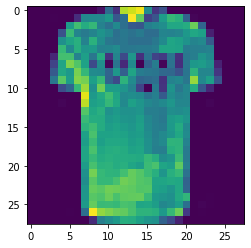

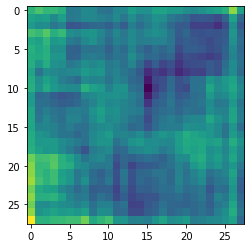

In [125]:
vae = VAE_Conv('cpu')

images, labels = next(iter(train_loader))  # Get the first batch of images
print(images[0].shape)  # Get the first image from the batch
recon, _ = vae(images[10].unsqueeze(0))  # Are mu and sigma correct

plt.figure(); plt.imshow(images[0].squeeze())
plt.figure(); plt.imshow(recon.cpu().detach().squeeze())

In [149]:
def train(autoencoder, data, kl_div_on=True, epochs=10, device='cpu', lr=1e-3):

  set_seed(seed)
  opt = torch.optim.Adam(autoencoder.parameters(), lr=lr, betas=(0.9, 0.999), weight_decay=0.5)

  liveloss = PlotLosses()

  for epoch in tqdm(range(0, epochs)):  # Run data over numerous epochs
  #for epoch in (range(epochs)):
    for batch, label in (data):  # Iterate over the batches of images and labels
      batch = batch.to(device)  # Send batch of images to the GPU
      opt.zero_grad()  # Set optimiser grad to 0
      x_hat, KL = autoencoder(batch)  # Generate predicted images (x_hat) by running batch of images through autoencoder
      #loss = ((batch - x_hat)**2).mean() + 0.01 * epoch * KL  # Calculate combined loss
      loss = ((batch - x_hat)**2).sum() + KL
      #print(loss)

      loss.backward()  # Back-propagat
      opt.step()  # Step the optimiser


  return autoencoder  # Return the trained autoencoder (for later analysis)

In [130]:
#Parameters
seed = 42
lr = 1e-3
momentum = 0.5
batch_size = 64
test_batch_size = 1000
n_epochs = 3

In [118]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

In [150]:
device = 'cuda'

vae_conv = VAE_Conv(device).to(device)
vae_conv = train(vae_conv.train(True), train_loader, epochs=3, device=device, lr=lr)

100%|██████████| 3/3 [00:40<00:00, 13.39s/it]


torch.Size([1000, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])


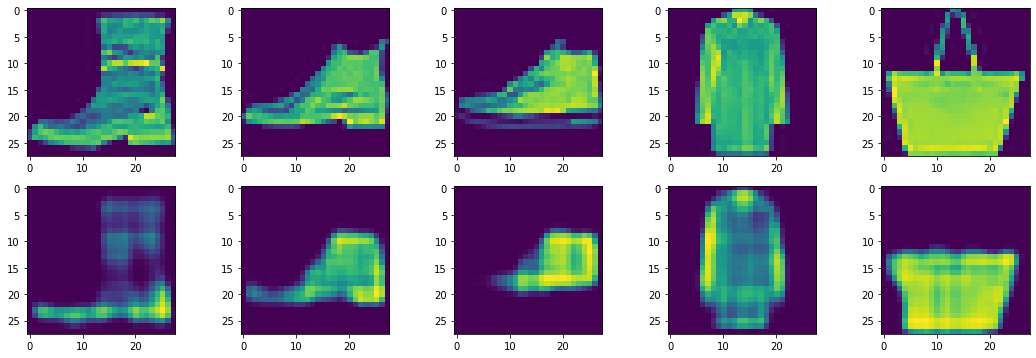

In [152]:
images, labels = next(iter(validation_loader))  # Get the first batch of images
# images, labels = next(iter(test_loader))  # Get the first batch of images
print(images.shape)  # Get the first image from the batch
vae_conv1 = vae_conv.eval()

_, ax = plt.subplots(2, 5, figsize=[18.5, 6])
for n, idx  in enumerate(torch.randint(0,images.shape[0], (5,))):
  recon, _ = vae_conv1(images[idx].unsqueeze(0).cuda())
  print(recon.shape)  # Are mu and sigma correct
  ax[0, n].imshow(images[idx].squeeze())
  ax[1, n].imshow(recon.cpu().detach().squeeze())

<br>

---

<br>

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

In [101]:
# your code here (add as many code blocks as you need)

text block for your answers

In [102]:
# you can reuse material from class, but explain very well modifications in the code and why you did them

text block for your answers

<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the three networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

In [103]:
### your code here, if you need any (add as many code blocks as you need)

text block for your answers

<br>

---

<br>

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

In [104]:
# your code here (add as many code blocks as you need)

text block for your answers

In [105]:
### your code here, if you need any (add as many code blocks as you need)

text block for your answers